## Lung Cancer Prognosis

The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system.

Dataset: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

    Total no. of attributes:16
    No .of instances:309
    Attribute information:

    1. Gender: M(male), F(female)
    2. Age: Age of the patient
    3. Smoking: YES=2 , NO=1.
    4. Yellow fingers: YES=2 , NO=1.
    5. Anxiety: YES=2 , NO=1.
    6. Peer_pressure: YES=2 , NO=1.
    7. Chronic Disease: YES=2 , NO=1.
    8. Fatigue: YES=2 , NO=1.
    9. Allergy: YES=2 , NO=1.
    10. Wheezing: YES=2 , NO=1.
    11. Alcohol: YES=2 , NO=1.
    12. Coughing: YES=2 , NO=1.
    13. Shortness of Breath: YES=2 , NO=1.
    14. Swallowing Difficulty: YES=2 , NO=1.
    15. Chest pain: YES=2 , NO=1.
    16. Lung Cancer: YES , NO.

### Importing the Libraries

In [1]:
import numpy as np                # creating arrays for linear algebra
import pandas as pd               # used to create dataframes for data processing using the csv file
import seaborn as sns             # used for visualization
import matplotlib.pyplot as plt   # used for plotting data

### Reading the CSV data file

In [38]:
dataset = pd.read_csv("dataset.csv")

### Exploring the dataset

In [39]:
dataset.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [40]:
dataset.shape

(309, 16)

In [41]:
dataset.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO  
4                    2                      1           1          NO

### Changing Gender into numerical format

    Male (M) = 0
    Female (F) = 1

In [42]:
# change GENDER Column values into 0 = male and 1 = female
dataset['GENDER'].replace('M', 0,inplace=True)
dataset['GENDER'].replace('F', 1,inplace=True)
dataset.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0   69        1               2        2              1   
1       0   74        2               1        1              1   
2       1   59        1               1        1              2   
3       0   63        2               2        2              1   
4       1   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO  
4                    2                      1           1          NO

### Exploring the dataset

In [44]:
print("Number of columns: "+str(len(dataset.columns)))
print("\nThe list of available column names:")
for index in range(len(dataset.columns)):
    print(" - " + dataset.columns[index])

Number of columns: 16

The list of available column names:
 - GENDER
 - AGE
 - SMOKING
 - YELLOW_FINGERS
 - ANXIETY
 - PEER_PRESSURE
 - CHRONIC DISEASE
 - FATIGUE 
 - ALLERGY 
 - WHEEZING
 - ALCOHOL CONSUMING
 - COUGHING
 - SHORTNESS OF BREATH
 - SWALLOWING DIFFICULTY
 - CHEST PAIN
 - LUNG_CANCER


In [88]:
dataset.isnull().sum()    # checking for Null values

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### Creating the dependent and independent variables with their labels

In [46]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
X = dataset.drop(['LUNG_CANCER'], axis=1)
y = dataset['LUNG_CANCER']

In [89]:
# Getting the independent columns name list
for index in range(len(X.columns)):
    print(" - " + X.columns[index])

 - GENDER
 - AGE
 - SMOKING
 - YELLOW_FINGERS
 - ANXIETY
 - PEER_PRESSURE
 - CHRONIC DISEASE
 - FATIGUE 
 - ALLERGY 
 - WHEEZING
 - ALCOHOL CONSUMING
 - COUGHING
 - SHORTNESS OF BREATH
 - SWALLOWING DIFFICULTY
 - CHEST PAIN


### Getting the count of data where cancer is positive and negative

In [48]:
from collections import Counter
counts = Counter(y)
label_count_list = list(counts.values())
print(counts)
print("These are the values: ", list(counts.values()))

Counter({'YES': 270, 'NO': 39})
These are the values:  [270, 39]


The above results shows a data imbalance between records which classifies cancer positive and negative, (Positive records = YES, Negative records = NO), hence we have to perform oversampling to balance out the data

### Creating a bar chart to display target feature imbalance before "oversampling"

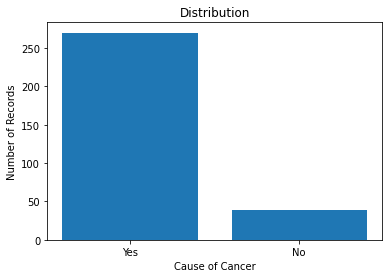

In [50]:
prediction_classes = ["Yes","No"]
count_of_prediction_classes = [270, 39]
totalRecords = sum(count_of_prediction_classes)

plt.title("Distribution")
plt.ylabel("Number of Records")
plt.xlabel("Cause of Cancer")
plt.bar(prediction_classes,count_of_prediction_classes)
plt.show()

In [51]:
# Getting the percentage of the predicted classes 
percentage_of_no_counts = (count_of_prediction_classes[0]/totalRecords) * 100
percentage_of_yes_counts = (count_of_prediction_classes[1]/totalRecords) * 100
print("Percentage of NO count: %1d \nPercentage of YES count: %2d" %(percentage_of_no_counts, percentage_of_yes_counts))

Percentage of NO count: 87 
Percentage of YES count: 12


### Performing Data Oversampling

In [54]:
# Current shape of the Yes and No
yes = dataset[dataset['LUNG_CANCER'] == "YES"]
no = dataset[dataset['LUNG_CANCER'] == "NO"]

print("Shape of Yes", yes.shape, "\nShape of No", no.shape)

# importing the necessary library for Oversampling the data
from imblearn.over_sampling import SMOTE

# Implementing Oversampling for Handling Imbalanced data
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y)

print()
print("This was the shape before Oversampling: ", X.shape)
print("This was the shape after Oversampling: ", X_res.shape) # 95 new records have been added to make all the data balanced

Shape of Yes (270, 16) 
Shape of No (39, 16)

This was the shape before Oversampling:  (309, 15)
This was the shape after Oversampling:  (540, 15)


In [55]:
from collections import Counter
counts = Counter(y_res)
label_count_list = list(counts.values())
print(counts)
print("These are the values: ", list(counts.values()))

Counter({'YES': 270, 'NO': 270})
These are the values:  [270, 270]


### Creating a bar chart to display target feature imbalance after "oversampling"

Hence now we have got 270 'Yes' and 'No' label count cases

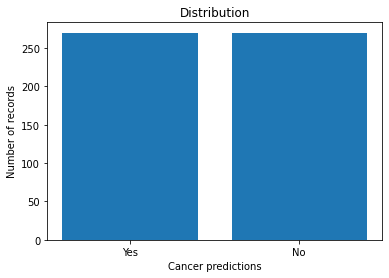

In [58]:
prediction_classes = ["Yes","No"]
count_of_prediction_classes = list(counts.values())
totalRecords = sum(count_of_prediction_classes)

plt.title("Distribution")
plt.ylabel("Number of records")
plt.xlabel("Cancer predictions")
plt.bar(prediction_classes,count_of_prediction_classes)
plt.show()

In [59]:
X_res.shape

(540, 15)

In [61]:
y_res.shape

(540,)

### Data Visualization

Performing data visualization to examine variations amoung the features of the dataset

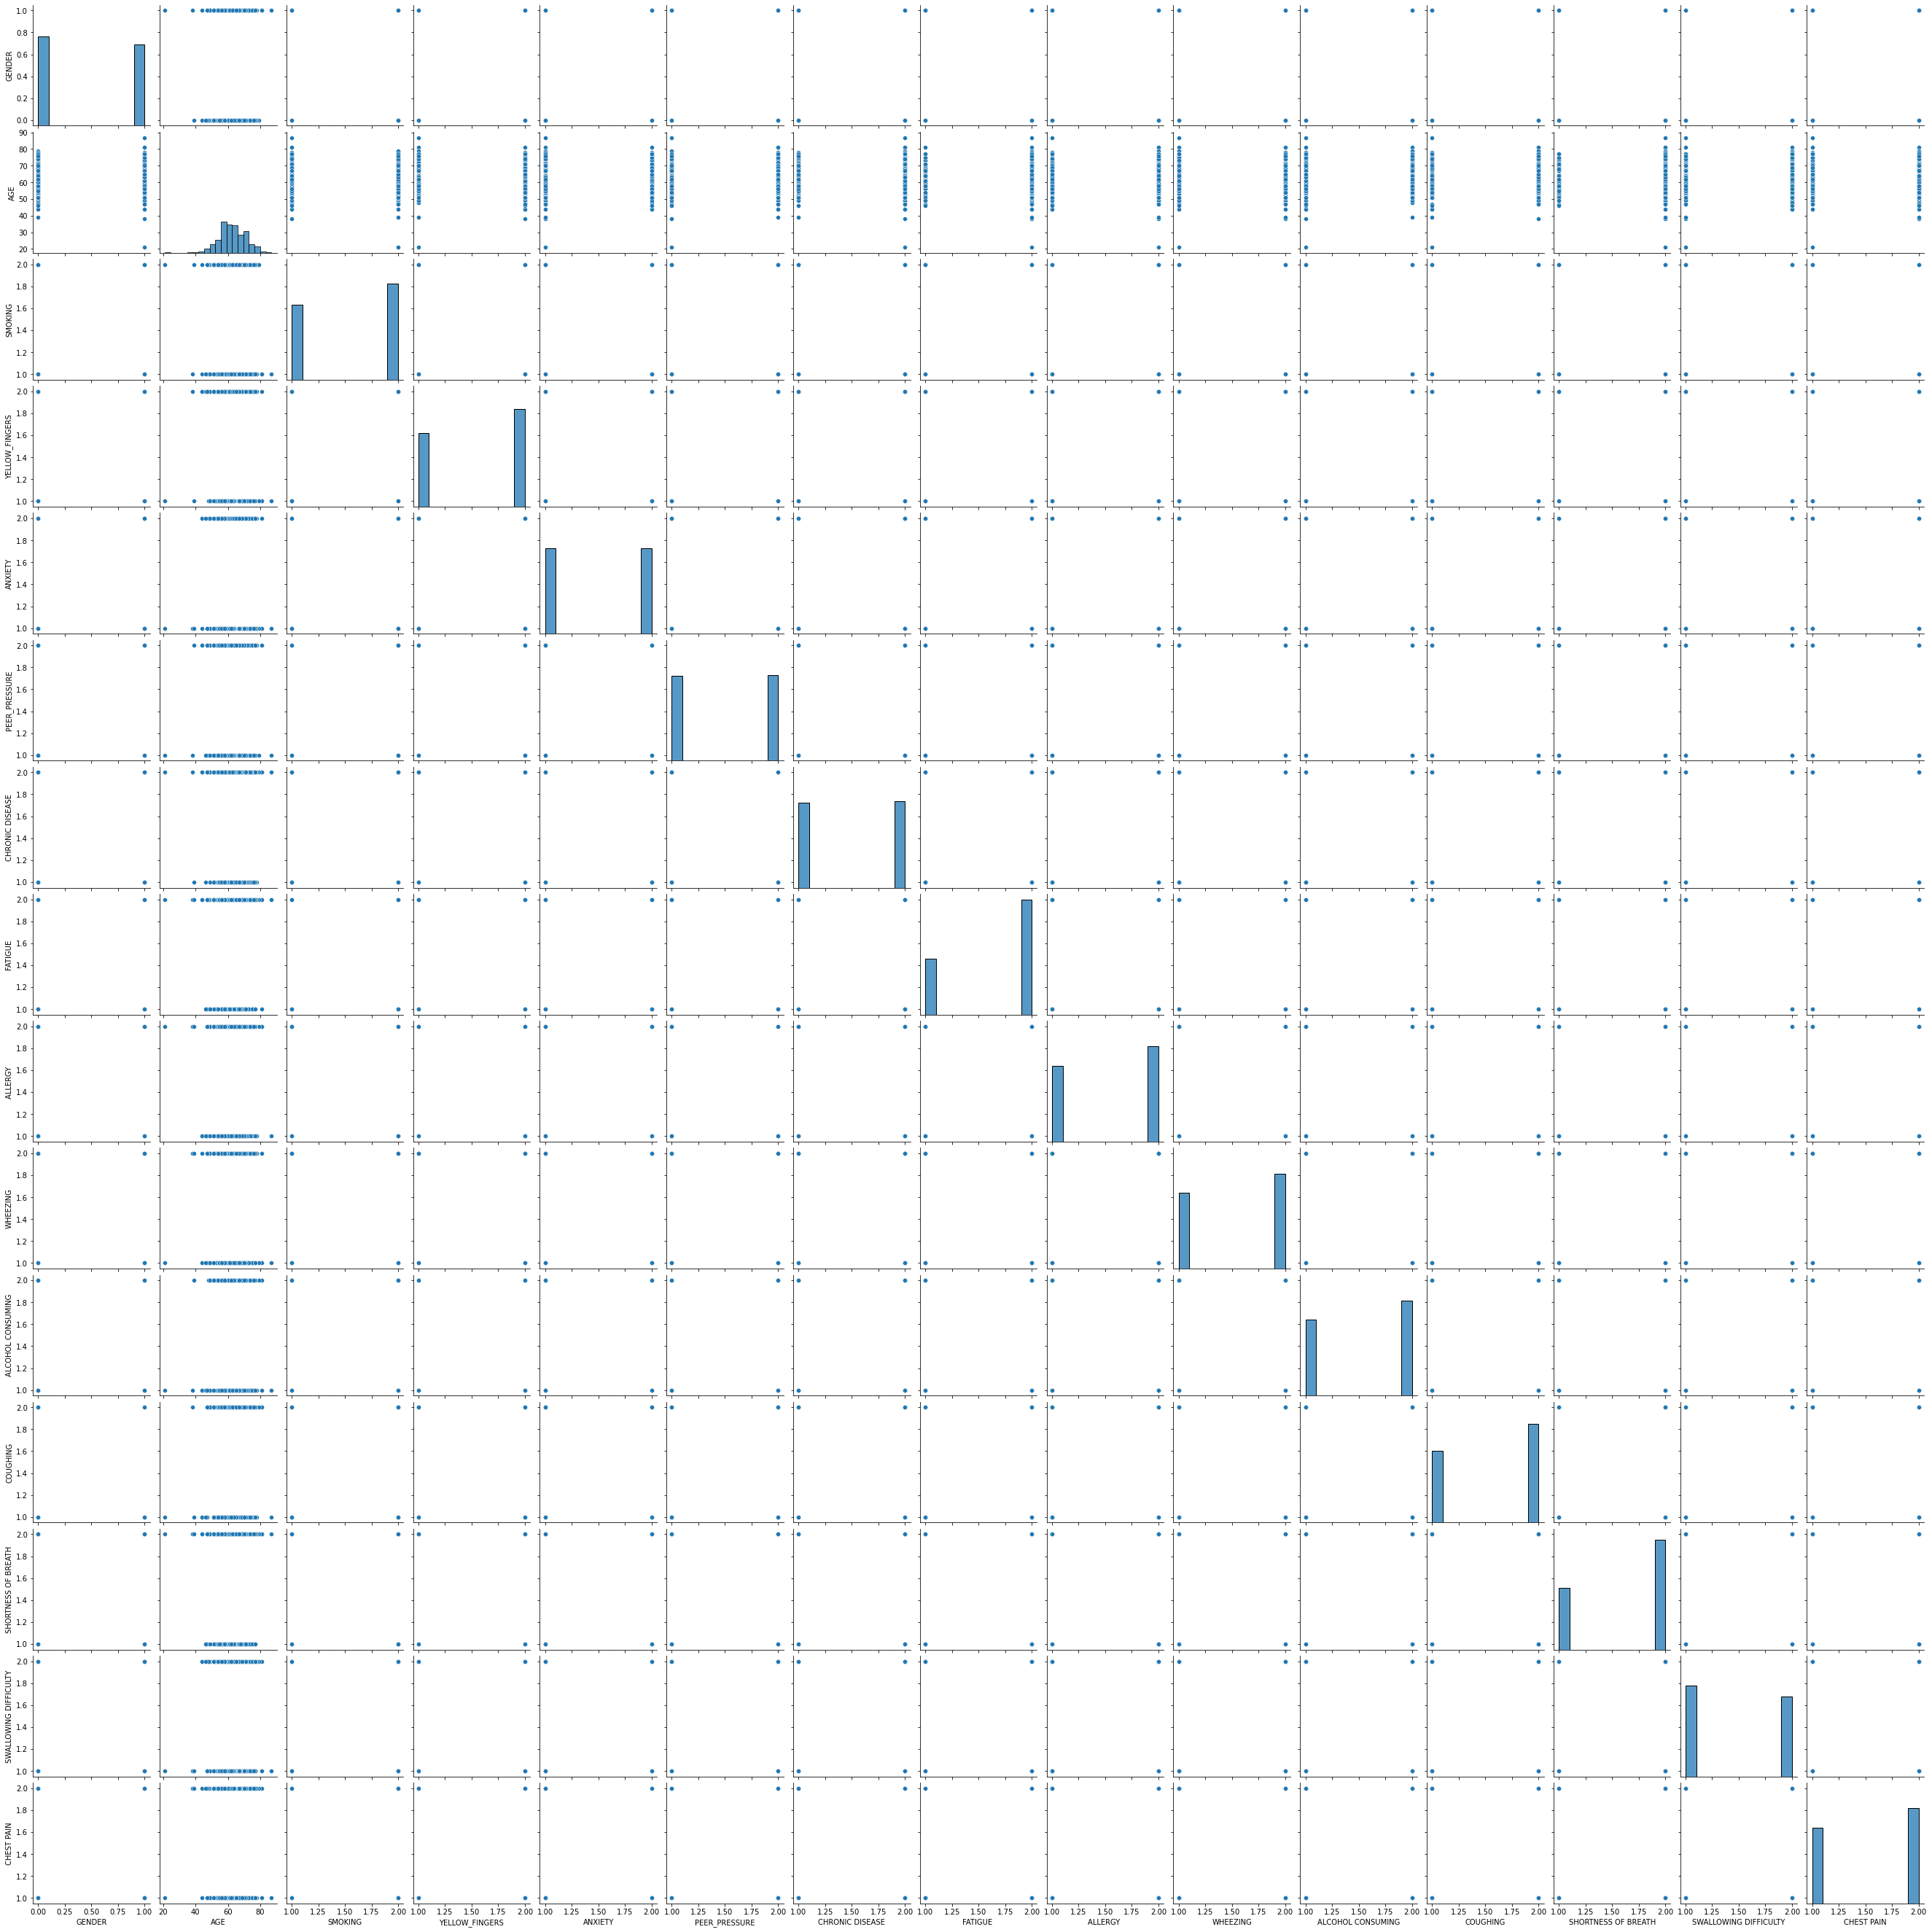

In [62]:
sns.pairplot(dataset)

### Performing Train Test Split

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split 

# dividing X_res, y_res into train and test data (Performing Train Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state = 101) 

### Predicting using the Descision Tree Classifier

Accuracy score: 92.5925925925926
Recall score: [0.97058824 0.88059701]
Precision score: [0.89189189 0.96721311]


'Sensitivity: 0.9701492537313433 | Specifictity: 0.9558823529411765'

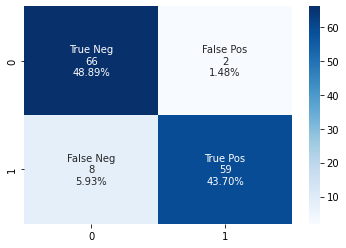

In [92]:
# training a DescisionTreeClassifier ( Accuracy score: 93%, Sensitivity: 97%, Specifictity: 96%)
# Total = 286
from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

# creating a confusion matrix 
cf_matrix = confusion_matrix(y_test, dtree_predictions) 

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

ac = accuracy_score(y_test, dtree_predictions)
rs = recall_score(y_test, dtree_predictions, average=None)
ps = precision_score(y_test, dtree_predictions, average=None)

print("Accuracy score: " + str(ac*100)) 
print("Recall score: " + str(rs))       
print("Precision score: " + str(ps)) 

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)  
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

### Predicting using Support Vector Machine Classification

Accuracy score: 97.77777777777777
Recall score: [0.95588235 1.        ]
Precision score: [1.         0.95714286]


'Sensitivity: 0.9701492537313433 | Specifictity: 0.9558823529411765'

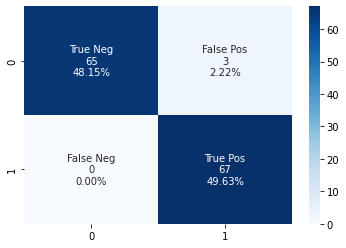

In [93]:
# training a linear SVM classifier ( Accuracy score: 97.7%, Sensitivity: 97%, Specifictity: 96%)
# Total = 290.7 âœ… Best Result
from sklearn.svm import SVC 

## training a SVM classifier 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 

## Prediction using SVM
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix, calculating accuracy, calculating score, calculating precision
cf_matrix = confusion_matrix(y_test, svm_predictions) 

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

ac = accuracy_score(y_test, svm_predictions)
rs = recall_score(y_test, svm_predictions, average=None)
ps = precision_score(y_test, svm_predictions, average=None)

print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

### Predicting using KNN Classifier

    Choosing the best K value for KNN using an Error Rate VS K Value Graph
    The goal is to find the K value with the Least Error Rate to get the maximum accuracy

In [98]:
from sklearn.neighbors import KNeighborsClassifier 
error_rate = []

for i in range(1,40):  #checking from 1 to 40 for the K value
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) # when the 'pred' value doesn't match with the 'y value' I get the mean of that

Text(0, 0.5, 'Error Rate')

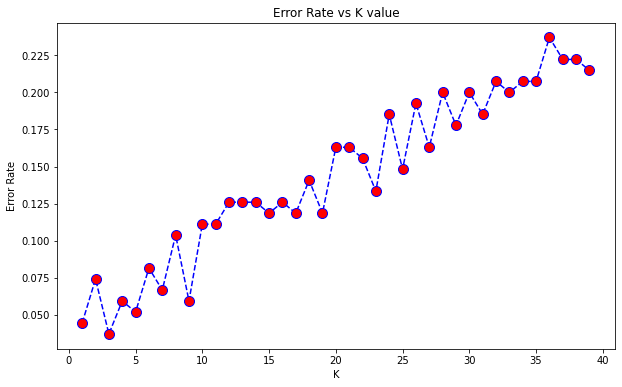

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red' ,markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Accuracy score: 96.29629629629629
Recall score: [0.95588235 0.97014925]
Precision score: [0.97014925 0.95588235]


'Sensitivity: 0.9701492537313433 | Specifictity: 0.9558823529411765'

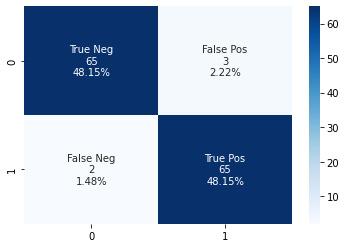

In [100]:
## Getting the value of K where the error rate is the minimum.
## Which is K = 3
## Training a KNN classifier ( Accuracy score: 96% , Sensitivity: 97%, Specifictity: 95.5%)
## Total = 288.5

## training a KNN classifier
value_of_k = 3
knn = KNeighborsClassifier(n_neighbors = value_of_k).fit(X_train, y_train) 

## Prediction using KNN
knn_predictions = knn.predict(X_test)  

## Accuracy on X_test 
accuracy = knn.score(X_test, y_test) 

## Creating a confusion matrix 
cf_matrix = confusion_matrix(y_test, knn_predictions) 

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

ac = accuracy_score(y_test, knn_predictions)
rs = recall_score(y_test, knn_predictions, average=None)
ps = precision_score(y_test, knn_predictions, average=None)

## Displaying the content
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

### Predicting using Navie Bayes Classifier

Accuracy score: 94.81481481481482
Recall score: [0.89705882 1.        ]
Precision score: [1.         0.90540541]


'Sensitivity: 0.9701492537313433 | Specifictity: 0.9558823529411765'

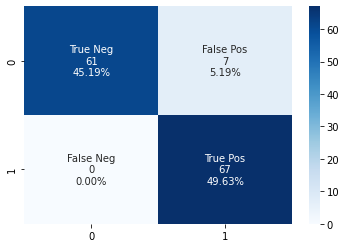

In [101]:
# training a Naive Bayes classifier ( Accuracy score: 94.8, Sensitivity: 97%, Specifictity: 95.5%)
# Total = 287.3
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
  
# creating a confusion matrix 
cf_matrix = confusion_matrix(y_test, gnb_predictions) 

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

ac = accuracy_score(y_test, gnb_predictions)
rs = recall_score(y_test, gnb_predictions, average=None)
ps = precision_score(y_test, gnb_predictions, average=None)

print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

### Saving the Model using joblib

In [102]:
# Saving the model using joblib
import joblib
joblib.dump(svm_model_linear, 'lung-cancer-pred-model.pkl')

['lung-cancer-pred-model.pkl']

### Performing predictions from the loaded model

In [103]:
loadedModel = joblib.load('lung-cancer-pred-model.pkl')
new_test_data = [[1, 21, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]]
loadedModel.predict(new_test_data)[0]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


'YES'

In [109]:
new_test_data = [[1, 21, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2]]
loadedModel.predict(new_test_data)[0]

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


'NO'